# Prueba con LighGBM

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import lightgbm as lgb
import json
from sklearn.model_selection import train_test_split


In [28]:
#INPUT
input = 'HT001-FE002'
fe = input.split("-")[1]
#EXPERIMENTO
experimento = 'EN-003'

#CARGO DATASETS
os.chdir("C:/Users/vyago/Desktop/Yago/Competencia/ypf")  # Directorio actual
train = pd.read_csv(f"../Exp/{fe}/train.csv")
test = pd.read_csv(f"../Exp/{fe}/test.csv")
y= np.sqrt(train["delta_WHP"])

X_train, X_test, y_train, y_test = train_test_split(
    train, y, test_size=0.2, random_state=42)


c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
#LEO LAS SALIDAS DE LA OPTIMIZACIÓN BAYESIANA DEL EXPERIMENTO

log_bo = pd.read_csv(f'../Exp/{input}/HT.csv', sep=",")

In [12]:
log_bo = log_bo.sort_values("loss")
log_bo["params"][0].replace("\'", "\"")



In [15]:
log_bo["params"]

1.134595    57457
1.103813     6869
1.139079    46685
1.121631    12469
1.129487    28018
1.109427     4052
1.136018    87415
1.116885    13127
1.102431     6107
1.133772    38451
1.135467    66720
1.132627    41433
1.115185    13822
1.106003     7161
1.114169     9498
1.129389    15338
1.123434    24080
Name: params, dtype: int64

In [20]:
log_bo["numero_de_iteracioniteration"][0]

45778

In [31]:
X_train = X_train.select_dtypes("number")

In [33]:
X_train = X_train[X_train.columns.drop(["delta_WHP","ID_FILA"])]#,"ID_EVENTO"])]
X_test = X_test[X_train.columns]

In [35]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test,label=y_test)


In [36]:
# Parámetros 

#params = {"feature_fraction": 0.5613312063035217, "learning_rate": 0.026639807051897578, "min_data_in_leaf": 2565, "num_leaves": 1137, "boosting_type": "gbdt", "max_bin": 128, "objective": "regression", "feature_pre_filter": False}
params = {"feature_fraction": 0.5613312063035217, "learning_rate": 0.026639807051897578, "min_data_in_leaf": 2565, "num_leaves": 1137, "boosting_type": "gbdt", "max_bin": 256, "objective": "regression", "feature_pre_filter": False}
params['metric'] = 'rmse' # métrica
params["num_iterations"] = 45778
params["max_depth"] = -1

In [52]:
dic={}
modelo=lgb.train(evals_result = dic,params = params,train_set=train_data,valid_sets=test_data)

c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
c:\Users\vyago\AppData\Local\Programs\Python\Python310\lib\site-packages\lightgbm\engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4454
[LightGBM] [Info] Number of data points in the train set: 20942, number of used features: 32
[LightGBM] [Info] Start training from score 0.331090
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's rmse: 1.15165
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's rmse: 1.14384
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's rmse: 1.13638
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's rmse: 1.12926
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's rmse: 1.12246
[LightGBM] [Warning] No further splits with positive gain, b

In [81]:
key = list(modelo.best_score)
modelo.best_score[key[0]]['rmse']

0.7579588872053902

In [31]:
x_test = test[x_train.columns]
x_test = x_test.astype("float32")
test["delta_WHP"]=np.square(modelo.predict(x_test))
prediccion=test[["ID_FILA","delta_WHP"]]


In [32]:
modelo.feature_importance

<bound method Booster.feature_importance of <lightgbm.basic.Booster object at 0x0000024A404A4520>>

In [33]:
if not os.path.isdir(f'../Exp/{experimento}'):
    os.makedirs(f'../Exp/{experimento}')
 
prediccion.to_csv(f"../Exp/{experimento}/prediccion.csv",header=False,index=False)

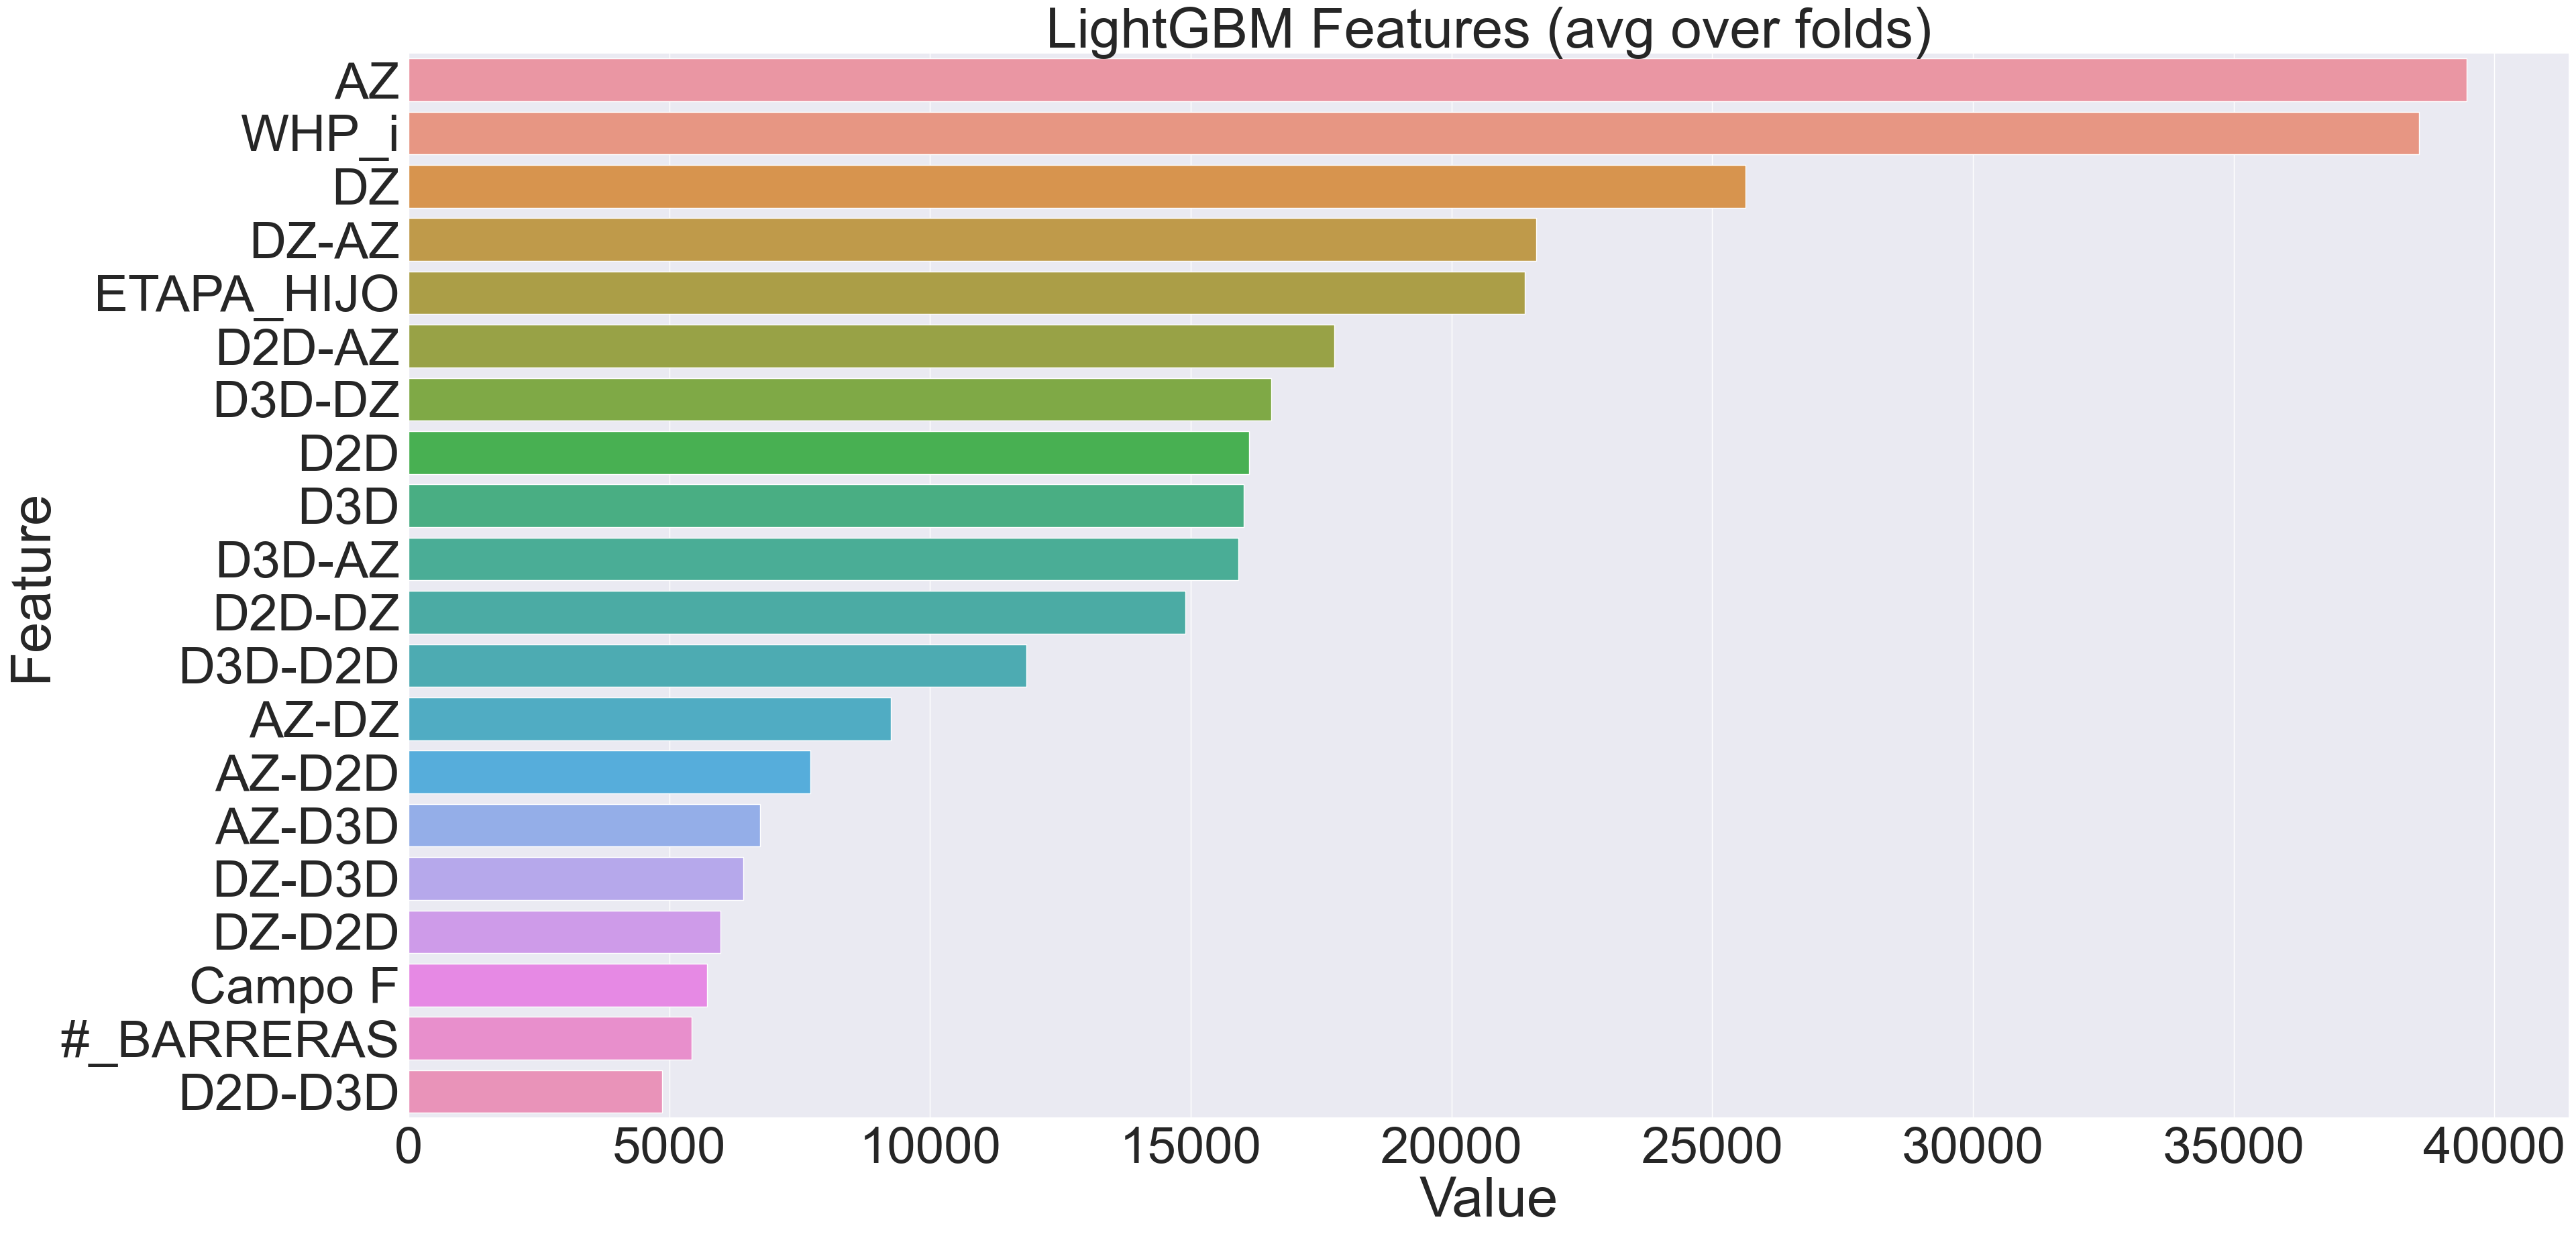

In [41]:
#IMPORTANCIA DE FEATURES

def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importance(),'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()

    plt.show()
    
plotImp(modelo,x_train)

In [ ]:
"""max_bin 
learning_rate    
num_iterations    
num_leaves        
min_data_in_leaf  
feature_fraction  
semilla  """         